# Exploratory Data Analysis

Credits to Jen Wadkins for the dataset. Dataset was taken from https://www.kaggle.com/datasets/threnjen/board-games-database-from-boardgamegeek. The dataset has games that were published up to the year of 2021.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(context='talk',style='darkgrid')

In [2]:
ratings_df = pd.read_csv('C:/Users/John/Documents/LHL Lecture Material/boardgame-recommender/data/user_ratings.csv')
artists_df = pd.read_csv('C:/Users/John/Documents/LHL Lecture Material/boardgame-recommender/data/artists_reduced.csv')
game_df = pd.read_csv('C:/Users/John/Documents/LHL Lecture Material/boardgame-recommender/data/games.csv')
designers_df = pd.read_csv('C:/Users/John/Documents/LHL Lecture Material/boardgame-recommender/data/designers_reduced.csv')
mechanics_df = pd.read_csv('C:/Users/John/Documents/LHL Lecture Material/boardgame-recommender/data/mechanics.csv')
publishers_df = pd.read_csv('C:/Users/John/Documents/LHL Lecture Material/boardgame-recommender/data/publishers_reduced.csv')
ratings_dist_df = pd.read_csv('C:/Users/John/Documents/LHL Lecture Material/boardgame-recommender/data/ratings_distribution.csv')
subcat_df = pd.read_csv('C:/Users/John/Documents/LHL Lecture Material/boardgame-recommender/data/subcategories.csv')
themes_df = pd.read_csv('C:/Users/John/Documents/LHL Lecture Material/boardgame-recommender/data/themes.csv')

In [3]:
# average, lowest, highest average rating
# mean and median are very similar, normal distribution?
game_df['AvgRating'].describe()

count    21925.000000
mean         6.424922
std          0.932477
min          1.041330
25%          5.836960
50%          6.453950
75%          7.052450
max          9.914290
Name: AvgRating, dtype: float64

Text(0.5, 0, 'Average Rating')

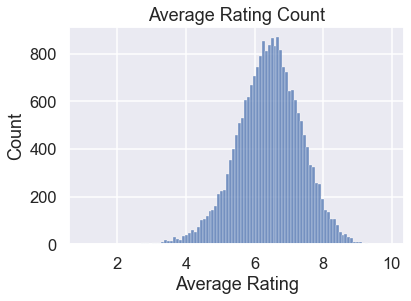

In [65]:
sns.histplot(game_df['AvgRating'], color='b')
plt.title('Average Rating Count')
plt.xlabel('Average Rating')

In [5]:
# Games have a minimum of atleast 30 ratings. The highest rated game is interesting to take a look at.
game_df['NumUserRatings'].describe()

count     21925.000000
mean        861.668324
std        3638.680857
min          30.000000
25%          56.000000
50%         123.000000
75%         395.000000
max      108101.000000
Name: NumUserRatings, dtype: float64

In [6]:
print('Most Rated Game on BoardGameGeeks: ', game_df[game_df['NumUserRatings']==108101]['Name'].values[0])
print('Highest AvgRating Game: ', game_df[game_df['AvgRating'] == game_df['AvgRating'].max()]['Name'].values[0])
print('Highest BayesAvgRating Game: ', game_df[game_df['BayesAvgRating'] == game_df['BayesAvgRating'].max()]['Name'].values[0])

Most Rated Game on BoardGameGeeks:  Pandemic
Highest AvgRating Game:  Captains' War
Highest BayesAvgRating Game:  Gloomhaven


Text(0, 0.5, 'Number of Games')

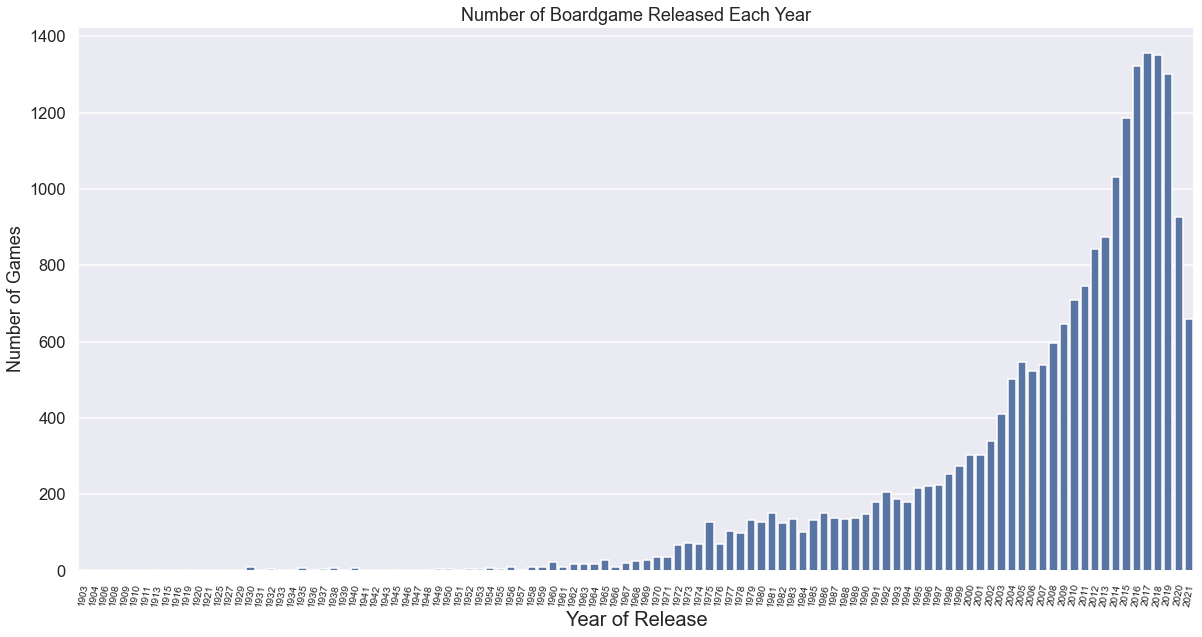

In [66]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=80, fontsize=10)
plt.title('Number of Boardgame Released Each Year')
sns.countplot(x = 'YearPublished', data=game_df[game_df['YearPublished']>1900], color='b')
plt.xlabel('Year of Release', fontsize=20)
plt.ylabel('Number of Games')

Text(0, 0.5, 'Number of Games')

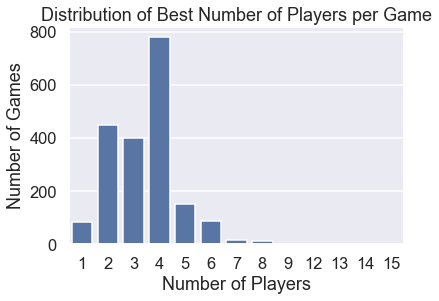

In [67]:
plt.title('Distribution of Best Number of Players per Game')
sns.countplot(x= 'BestPlayers', data=game_df[game_df['BestPlayers']>0], color='b')
plt.xlabel('Number of Players')
plt.ylabel('Number of Games')

In [9]:
game_df['BestPlayers'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 21925 entries, 0 to 21924
Series name: BestPlayers
Non-Null Count  Dtype
--------------  -----
21925 non-null  int64
dtypes: int64(1)
memory usage: 171.4 KB


In [10]:
game_df['MfgAgeRec'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 21925 entries, 0 to 21924
Series name: MfgAgeRec
Non-Null Count  Dtype
--------------  -----
21925 non-null  int64
dtypes: int64(1)
memory usage: 171.4 KB


Text(0.5, 1.0, 'Distribution of the Recommended Age per Game')

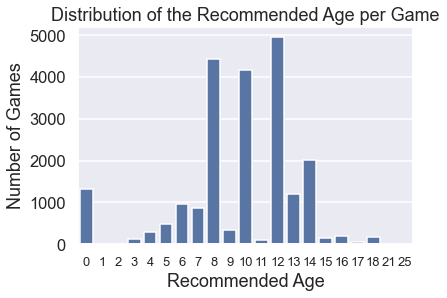

In [68]:
sns.countplot(x='MfgAgeRec', data=game_df[game_df['MfgAgeRec']>=0], color='b')
plt.xticks(fontsize=13)
plt.xlabel('Recommended Age')
plt.ylabel('Number of Games')
plt.title('Distribution of the Recommended Age per Game')

Text(0.5, 1.0, 'Distribution of the Game Length')

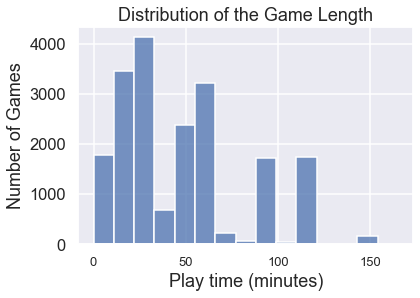

In [73]:
sns.histplot(x='MfgPlaytime', data=game_df[game_df['MfgPlaytime']<180], color='b', bins=15)
plt.xticks(fontsize=13)
plt.xlabel('Play time (minutes)')
plt.ylabel('Number of Games')
plt.title('Distribution of the Game Length')

In [100]:
def game_length(time):
    """
        Takes in a time and returns if it is short, medium, long, very long.
        
        Parameters:
            time(int): integer value
            
        Returns:
            short if time =< 30
            medium if 30 < time <= 60
            long if 60 < time <= 90
            very long time > 90
    """
    if time <= 30:
        return 'short'
    elif time > 30 and time <=60:
        return 'medium'
    elif time > 60 and time <= 90:
        return 'long'
    else:
        return 'very long'

game_df['game_length'] = game_df['MfgPlaytime'].apply(game_length)

Text(0.5, 1.0, 'Distribution of Game Length')

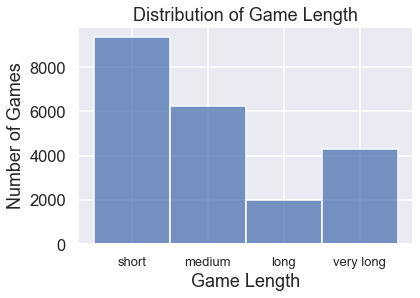

In [99]:
sns.histplot(game_df.sort_values('MfgPlaytime')['game_length'], color='b')
plt.xticks(fontsize=13)
plt.xlabel('Game Length')
plt.ylabel('Number of Games')
plt.ticklabel_format(style='plain', axis='y')
plt.title('Distribution of Game Length')

In [13]:
print('Number of Unique Users:', ratings_df['Username'].nunique())

Number of Unique Users: 411374


Text(0.5, 1.0, 'Distribution of the User Ratings')

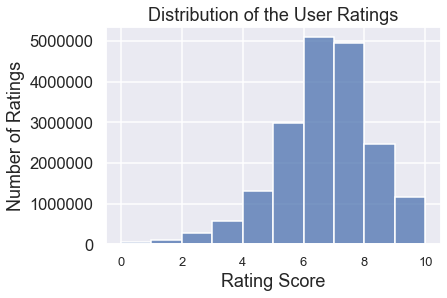

In [70]:
sns.histplot(x='Rating', data=ratings_df[ratings_df['Rating']>=0], bins=10, color='b')
plt.xticks(fontsize=13)
plt.xlabel('Rating Score')
plt.ylabel('Number of Ratings')
plt.ticklabel_format(style='plain', axis='y')
plt.title('Distribution of the User Ratings')